# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

![image.png](attachment:image.png)

data source: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/kernels

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
!pip install jupyterthemes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 4.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 
#import libraries 
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
# Load the data
reviews_df = pd.read_csv('/content/drive/MyDrive/Dash_plotly_home/amazon_reviews.csv') #you should change the path 
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
# Load spacy
nlp = spacy.load('en_core_web_sm')

def clean_string(text, stem="None"):

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub(r'\n', '', text)
    

    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Remove stop words
    text = text.split()
    
    useless_words = ['hi', 'im']

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]


    if stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]

    final_string = ' '.join(text_stemmed)

    return final_string

In [ ]:
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].apply(lambda x: clean_string(x, stem='Lem')) #apply the function clean_string
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) #remove stop words from the column. 

In [ ]:
reviews_df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [ ]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
import pandas as pd   #create the Date receiced column that will be used later in the dashbboard
reviews_df['Date received'] = pd.to_datetime(reviews_df['date'].str.strip(), infer_datetime_format=True)
reviews_df['Date received'] = pd.to_datetime(reviews_df['Date received'].dt.strftime('%m-%d-%Y'))

In [ ]:
min_date = reviews_df["Date received"].min()
max_date = reviews_df["Date received"].max()
max_date
#these values will be used later in the dashboard

Timestamp('2018-07-31 00:00:00')

In [ ]:
reviews_df  # format="%m/%d/%Y" #this format is required in the dash

,rating,date,variation,verified_reviews,feedback,Date received
0,5,31-Jul-18,Charcoal Fabric,love echo,1,2018-07-31
1,5,31-Jul-18,Charcoal Fabric,loved,1,2018-07-31
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,2018-07-31
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learns dinosaur control l...,1,2018-07-31
4,5,31-Jul-18,Charcoal Fabric,music,1,2018-07-31
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,perfect kid adult everyone,1,2018-07-30
3146,5,30-Jul-18,Black Dot,listening music searching location checking ti...,1,2018-07-30
3147,5,30-Jul-18,Black Dot,love thing running entire home tv light thermo...,1,2018-07-30
3148,5,30-Jul-18,White Dot,complaint sound quality isnt great mostly use ...,1,2018-07-30


In [ ]:
# View DataFrame Statistical Summary
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


**MINI CHALLENGE #1:** 
- **Drop the 'date' column from the DataFrame** 
- **Ensure that the column has been succesfully dropped** 

In [ ]:
reviews_df = reviews_df.drop(['date'], axis=1)
reviews_df.head()

,rating,variation,verified_reviews,feedback,Date received
0,5,Charcoal Fabric,love echo,1,2018-07-31
1,5,Charcoal Fabric,loved,1,2018-07-31
2,4,Walnut Finish,sometimes playing game answer question correct...,1,2018-07-31
3,5,Charcoal Fabric,lot fun thing yr old learns dinosaur control l...,1,2018-07-31
4,5,Charcoal Fabric,music,1,2018-07-31


# Bigram Part

In [ ]:
#bigrams_EDA , cleaning for the bigram extraction task
bigram_freq = lambda s: list(nltk.FreqDist(nltk.bigrams(s.split(" "))).items())
reviewss_df = reviews_df.copy()
reviewss_df['bigrams']= reviewss_df['verified_reviews'].apply(bigram_freq)
reviewss_df =reviewss_df.explode('bigrams')
reviewss_df['bigram'], reviewss_df['b'] = reviewss_df.bigrams.str

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030" "]+", re.UNICODE)
    return re.sub(emoj, '', str(data)) 

reviewss_df['bigram'] = reviewss_df.apply(lambda x: remove_emojis(x.bigram), axis=1)
reviewss_df['bigram'] = reviewss_df['bigram'].astype(str).str.replace("(", "")
reviewss_df['bigram'] = reviewss_df['bigram'].astype(str).str.replace("[!@#$]", "") 
reviewss_df['bigram'] = reviewss_df['bigram'].astype(str).str.replace(")", "")
reviewss_df['bigram'] = reviewss_df['bigram'].astype(str).str.replace("'", "")
reviewss_df['bigram'] = reviewss_df['bigram'].astype(str).str.replace("'", "")
reviewss_df['bigram'] = reviewss_df['bigram'].astype(str).str.replace(",", "_")
reviewss_df['bigram'] = reviewss_df['bigram'].astype(str).str.replace("_ ", "_")
reviewss_df['bigram'] = reviewss_df['bigram'].astype(str).str.replace(" _", "_")
del reviewss_df['b']
bigram_df =reviewss_df.groupby(['bigram','variation']).size().reset_index() 
bigram_df = bigram_df.rename(columns={0: 'value', 'variation': 'company','bigram':'ngram'})# the output is a dataframe with bigrams grouped by varitation with count. 

<ipython-input-14-74279bd3728f>:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  reviewss_df['bigram'], reviewss_df['b'] = reviewss_df.bigrams.str
<ipython-input-14-74279bd3728f>:31: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviewss_df['bigram'] = reviewss_df['bigram'].astype(str).str.replace("(", "")
<ipython-input-14-74279bd3728f>:32: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewss_df['bigram'] = reviewss_df['bigram'].astype(str).str.replace("[!@#$]", "")
<ipython-input-14-74279bd3728f>:33: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviewss_df['bigram'] = reviewss_

In [ ]:
bigram_df

,ngram,company,value
0,_course,Black Plus,1
1,_download,Black Spot,1
2,_haven’t,Black Spot,1
3,_love,Black Spot,1
4,_much,Black,1
...,...,...,...
27074,“white”_option,White Show,1
27075,“your”_music,Charcoal Fabric,2
27076,”_alexa,Black Spot,1
27077,”_good,Black Spot,1


In [ ]:
bigram_df = bigram_df[bigram_df.ngram != '_']
bigram_df = bigram_df[bigram_df.ngram != '_a']
bigram_df = bigram_df[bigram_df.ngram != '_not']
bigram_df = bigram_df[bigram_df.ngram != '_and']
bigram_df = bigram_df[bigram_df.ngram != ' _not']
bigram_df = bigram_df[bigram_df.ngram != ' _and']
bigram_df = bigram_df[bigram_df.ngram != ' _are']

In [ ]:
#cleanning 
bigram_df = bigram_df[bigram_df.ngram != 'nan']
bigram_df['ngram'] = bigram_df['ngram'].astype(str).str.replace("—", " ")
bigram_df['ngram'] = bigram_df['ngram'].astype(str).str.replace("“", " ")
bigram_df['ngram'] = bigram_df['ngram'].astype(str).str.replace("‘", " ")
bigram_df['ngram'] = bigram_df['ngram'].astype(str).str.replace("’", " ")
bigram_df['ngram'] = bigram_df['ngram'].astype(str).str.replace(" ", "")
bigram_df['ngram'] = bigram_df['ngram'].astype(str).str.replace("”", " ")
bigram_df

,ngram,company,value
0,_course,Black Plus,1
1,_download,Black Spot,1
2,_havent,Black Spot,1
3,_love,Black Spot,1
4,_much,Black,1
...,...,...,...
27074,white _option,White Show,1
27075,your _music,Charcoal Fabric,2
27076,_alexa,Black Spot,1
27077,_good,Black Spot,1


In [ ]:
embed_df = bigram_df.copy()   #embed_df will be used later in the dashboard, is just a groupby dataframe 
#embed_df = embed_df.ngram.value_counts()
embed_df = embed_df.groupby('ngram').count().reset_index()
embed_df = embed_df.sort_values(
   by="company",
    ascending=False
)
embed_df = embed_df.rename(columns={'ngram': 'bigram', 'company': 'count','value':'words'}) #just remaining for the dashboard
embed_df = embed_df.iloc[:22]  #take only the 21 most frequent bigrams that will be plotted in the dashboard later
embed_df

,bigram,count,words
19683,turn_light,13,13
5511,echo_dot,13,13
18237,still_learning,13,13
11367,love_echo,13,13
21911,work_well,13,13
5454,easy_set,13,13
21836,work_great,13,13
20810,wa_easy,12,12
8216,great_product,12,12
14070,play_music,12,12


# TASK #3: PERFORM DATA VISUALIZATION

In [ ]:
reviews_df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [ ]:
# Check for missing values
reviews_df.isnull()

,rating,variation,verified_reviews,feedback,Date received
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3145,False,False,False,False,False
3146,False,False,False,False,False
3147,False,False,False,False,False
3148,False,False,False,False,False


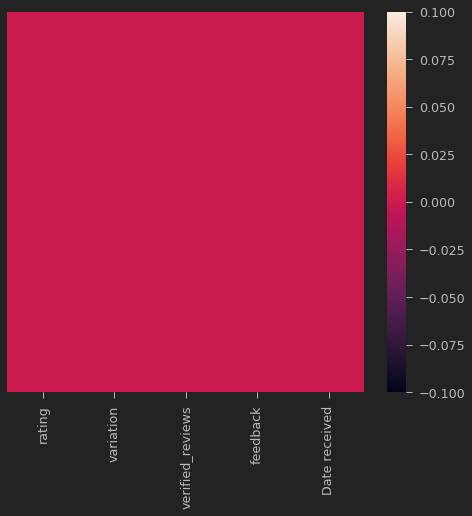

In [ ]:
# Check for missing with a heatmap to confirm
sns.heatmap(reviews_df.isnull(), yticklabels = False)

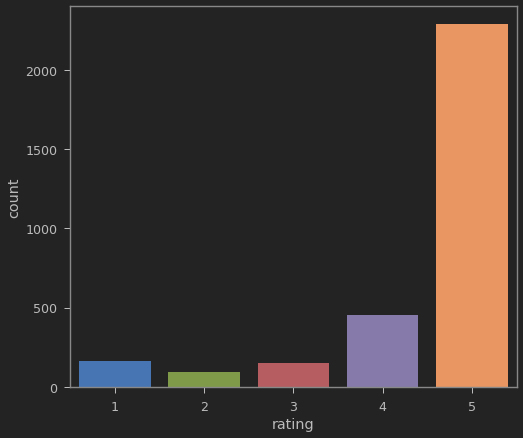

In [ ]:
# Plot the count plot for the ratings 
sns.countplot(x = reviews_df['rating'])


**MINI CHALLENGE #2:** 
- **Plot the countplot for the feedback column**
- **Roughly how many positive and negative feedback are present in the dataset?**

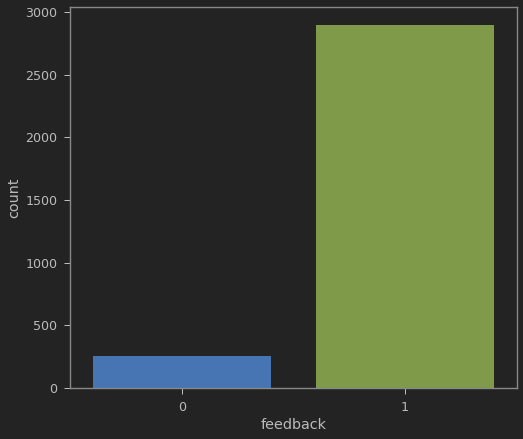

In [ ]:
# Plot the count plot for the feedback
sns.countplot(x = reviews_df['feedback'])

# TASK #4: PERFORM DATA EXPLORATION

In [ ]:
# Get the length of characters for each verfied review
reviews_df['length'] = (reviews_df['verified_reviews']).apply(len)

In [ ]:
reviews_df

,rating,variation,verified_reviews,feedback,Date received,length
0,5,Charcoal Fabric,love echo,1,2018-07-31,9
1,5,Charcoal Fabric,loved,1,2018-07-31,5
2,4,Walnut Finish,sometimes playing game answer question correct...,1,2018-07-31,106
3,5,Charcoal Fabric,lot fun thing yr old learns dinosaur control l...,1,2018-07-31,107
4,5,Charcoal Fabric,music,1,2018-07-31,5
...,...,...,...,...,...,...
3145,5,Black Dot,perfect kid adult everyone,1,2018-07-30,26
3146,5,Black Dot,listening music searching location checking ti...,1,2018-07-30,94
3147,5,Black Dot,love thing running entire home tv light thermo...,1,2018-07-30,256
3148,5,White Dot,complaint sound quality isnt great mostly use ...,1,2018-07-30,223


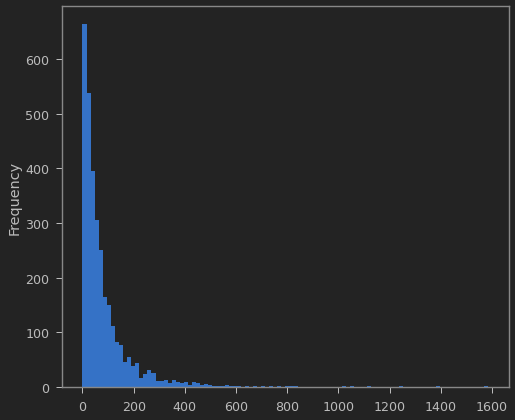

In [ ]:
# Plot the histogram for the length
reviews_df['length'].plot(bins = 100, kind = 'hist')

In [ ]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,81.072063
std,1.068506,0.273778,109.604875
min,1.000000,0.000000,0.000000
25%,4.000000,1.000000,19.000000
50%,5.000000,1.000000,46.000000
75%,5.000000,1.000000,101.000000
max,5.000000,1.000000,1586.000000


In [ ]:
# Let's see the longest message 
reviews_df[reviews_df['length'] == 2851]

,rating,variation,verified_reviews,feedback,Date received,length


In [ ]:
# Grab only the verified reviews column and show the first element
#reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

**MINI CHALLENGE #3:**
- **View the message with the average length**

In [ ]:
# View the message with the average length
reviews_df[reviews_df['length'] == 132]['verified_reviews'].iloc[0]

'work replaced expired bedside radioalarmit took realize option setting involved using touch screenmaybe said something setup process'

# TASK #5: PLOT THE WORDCLOUD

In [ ]:
# Obtain only the positive reviews
positive = reviews_df[reviews_df['feedback']==1]

In [ ]:
positive

,rating,variation,verified_reviews,feedback,Date received,length
0,5,Charcoal Fabric,love echo,1,2018-07-31,9
1,5,Charcoal Fabric,loved,1,2018-07-31,5
2,4,Walnut Finish,sometimes playing game answer question correct...,1,2018-07-31,106
3,5,Charcoal Fabric,lot fun thing yr old learns dinosaur control l...,1,2018-07-31,107
4,5,Charcoal Fabric,music,1,2018-07-31,5
...,...,...,...,...,...,...
3145,5,Black Dot,perfect kid adult everyone,1,2018-07-30,26
3146,5,Black Dot,listening music searching location checking ti...,1,2018-07-30,94
3147,5,Black Dot,love thing running entire home tv light thermo...,1,2018-07-30,256
3148,5,White Dot,complaint sound quality isnt great mostly use ...,1,2018-07-30,223


In [ ]:
# Obtain the negative reviews only
negative = reviews_df[reviews_df['feedback']==0]

In [ ]:
negative

,rating,variation,verified_reviews,feedback,Date received,length
46,2,Charcoal Fabric,like siri fact siri answer accurately alexa do...,0,2018-07-30,110
111,2,Charcoal Fabric,sound terrible u want good music get bose,0,2018-07-30,41
141,1,Charcoal Fabric,much feature,0,2018-07-30,12
162,1,Sandstone Fabric,stopped working week didnt follow command real...,0,2018-07-30,63
176,2,Heather Gray Fabric,sad joke worthless,0,2018-07-30,18
...,...,...,...,...,...,...
3047,1,Black Dot,echo dot responds u arent even talking ive unp...,0,2018-07-30,64
3048,1,White Dot,connected phone playlist,0,2018-07-30,24
3067,2,Black Dot,negative product terrible sound quality massiv...,0,2018-07-30,151
3091,1,Black Dot,didn’t order,0,2018-07-30,12


In [ ]:
# Convert to list format
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

In [ ]:
type(sentences)

list

In [ ]:
# Join all reviews into one large string
sentences_as_one_string = ' '.join(sentences)

In [ ]:
type(sentences_as_one_string)

str

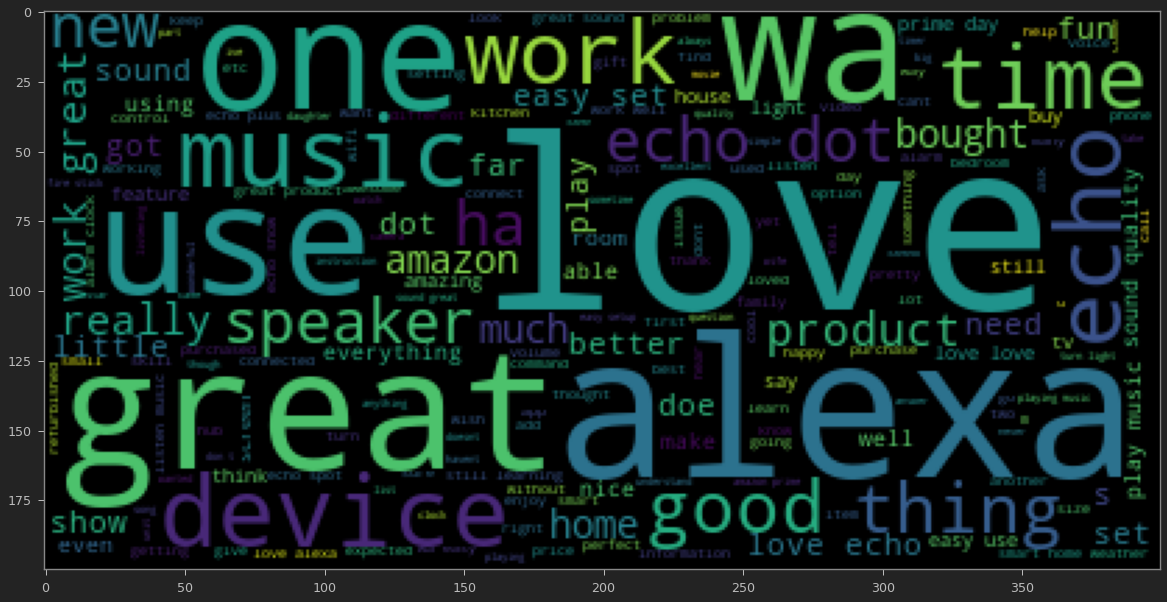

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

**MINI CHALLENGE #4:** 
- **Plot the wordcloud of the "negative" dataframe** 
- **What do you notice? Does the data make sense?**

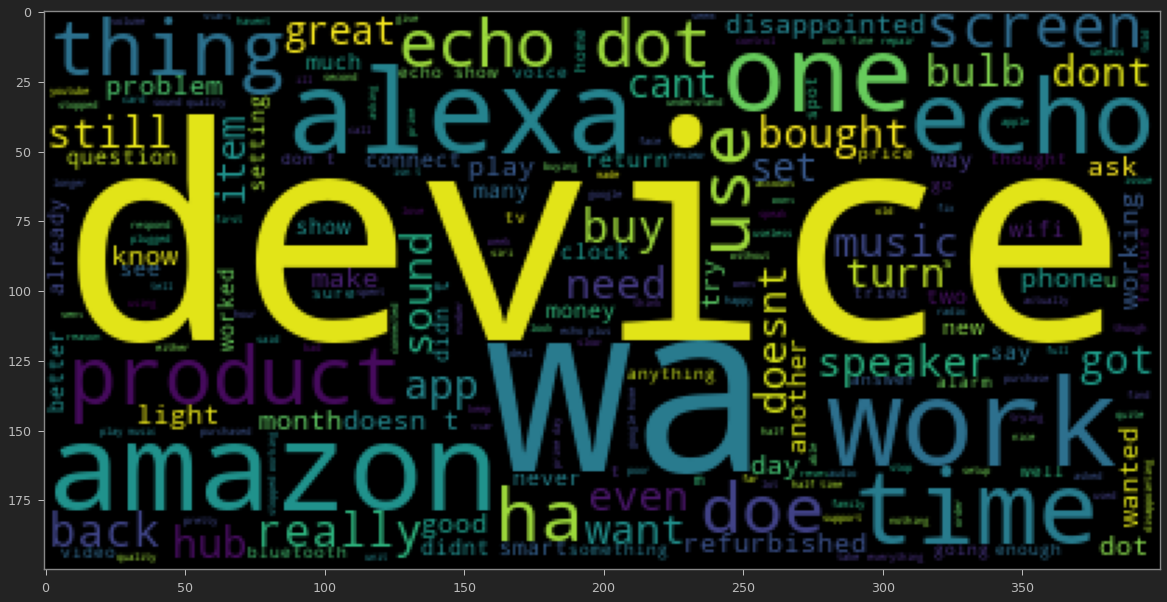

In [ ]:
# Plot the wordcloud of the "negative" dataframe
sentences = negative['verified_reviews'].tolist() # Convert to list format
sentences_as_one_string = ' '.join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# TASK #6: TEXT DATA CLEANING 101

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
Test = '$I Love Coursera &Rhyme Guided Projects...!!!!'

In [ ]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['I',
 ' ',
 'L',
 'o',
 'v',
 'e',
 ' ',
 'C',
 'o',
 'u',
 'r',
 's',
 'e',
 'r',
 'a',
 ' ',
 'R',
 'h',
 'y',
 'm',
 'e',
 ' ',
 'G',
 'u',
 'i',
 'd',
 'e',
 'd',
 ' ',
 'P',
 'r',
 'o',
 'j',
 'e',
 'c',
 't',
 's']

In [ ]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I Love Coursera Rhyme Guided Projects'

In [ ]:
import nltk # Natural Language tool kit 

In [ ]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
STOPWORDS = stopwords.words('english') #used in the dash plotly


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
Test_punc_removed_join = 'I have been enjoying these coding, programming and AI guided Projects on Rhyme and Coursera'

In [ ]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [ ]:
Test_punc_removed_join_clean

['enjoying',
 'coding,',
 'programming',
 'AI',
 'guided',
 'Projects',
 'Rhyme',
 'Coursera']

**MINI CHALLENGE #5:** 
- **For the following text, create a pipeline to remove punctuations followed by removing stopwords and test the pipeline**
- **mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'**

In [ ]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'

In [ ]:
import string

In [ ]:
challege = [ char for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations', 'text']

# TASK #7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

![image.png](attachment:image.png)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


**MINI CHALLENGE #6:**
- **Without doing any code, perform count vectorization for the following list:**
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
- **Confirm your answer with code**

In [ ]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer.fit_transform(mini_challenge)
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [ ]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def process_text(text):
    test_punc_removed = [char for char in text if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_removed = [word for word in test_punc_removed.split() if word.lower() not in stopwords.words('english')]
    
    return test_punc_removed

In [ ]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(process_text)

In [ ]:
# show the original review
print(reviews_df['verified_reviews'][5]) 

received echo gift needed another bluetooth something play music easily accessible found smart speaker can’t wait see else


In [ ]:
# show the cleaned up version
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'can’t', 'wait', 'see', 'else']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = process_text)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [ ]:
print(vectorizer.get_feature_names())

['abay', 'abc', 'abd', 'ability', 'able', 'abode', 'absolutely', 'absolutly', 'ac', 'accent', 'accentthe', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessneeds', 'accessory', 'accessto', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'activate', 'activated', 'activates', 'activating', 'activation', 'actively', 'activity', 'actually', 'ad', 'adapted', 'adapter', 'adapting', 'add', 'added', 'addict', 'addicted', 'adding', 'addition', 'additional', 'additionally', 'addons', 'address', 'addressed', 'adept', 'adequate', 'adjacent', 'adjust', 'adjusting', 'adjustment', 'adjusts', 'admit', 'adorable', 'adult', 'advance', 'advanced', 'advantage', 'advertise', 'advertised', 'advertisement', 'advertising', 'advice', 'advise', 'advised', 'aesthetic', 'af', 'affirmation', 'affirmco

In [ ]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
reviews_countvectorizer.shape

(3150, 3935)

In [ ]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [ ]:
X = reviews

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

**MINI CHALLENGE #7:**
- **What is the shape of X and Y**

In [ ]:
X.shape, y.shape

((3150, 3935), (3150,))

# TASK #9: TRAIN AND TEST NAIVE BAYES CLASSIFIER MODEL

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

![image.png](attachment:image.png)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

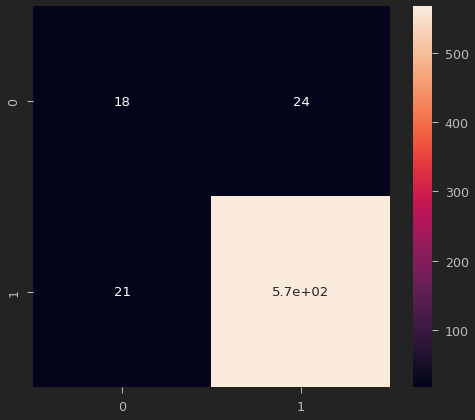

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)


In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.46      0.43      0.44        42
           1       0.96      0.96      0.96       588

    accuracy                           0.93       630
   macro avg       0.71      0.70      0.70       630
weighted avg       0.93      0.93      0.93       630



**MINI CHALLENGE #8:**
- **Train a logistic Regression classifier and assess its performance**

              precision    recall  f1-score   support

           0       0.63      0.40      0.49        42
           1       0.96      0.98      0.97       588

    accuracy                           0.94       630
   macro avg       0.79      0.69      0.73       630
weighted avg       0.94      0.94      0.94       630



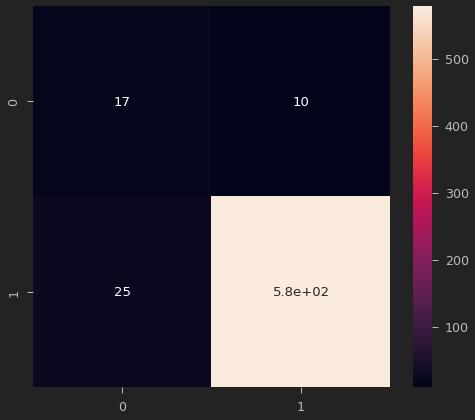

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS

# MINI CHALLENGE SOLUTIONS

**MINI CHALLENGE #2 SOLUTION:** 
- **Plot the countplot for the feedback column**
- **Roughly how many positive and negative feedback are present in the dataset?**

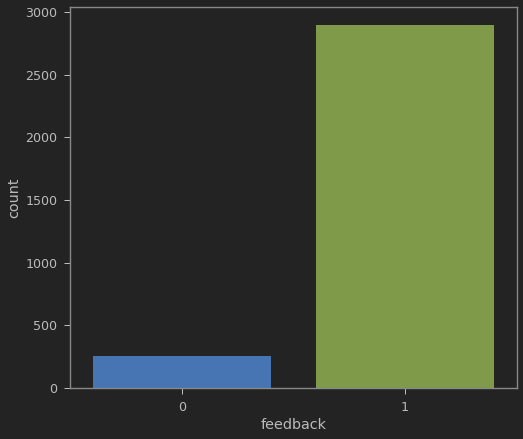

In [ ]:
# Plot the countplot for feedback
# Positive ~2800
# Negative ~250
sns.countplot(x = reviews_df['feedback'])

**MINI CHALLENGE #3 SOLUTION:**
- **View the message with the average length**

In [ ]:
# Let's see the message with mean length 
reviews_df[reviews_df['length'] == 132]['verified_reviews'].iloc[0]

'work replaced expired bedside radioalarmit took realize option setting involved using touch screenmaybe said something setup process'

**MINI CHALLENGE #4 SOLUTION:** 
- **Plot the wordcloud of the "negative" dataframe** 
- **What do you notice? Does the data make sense?**

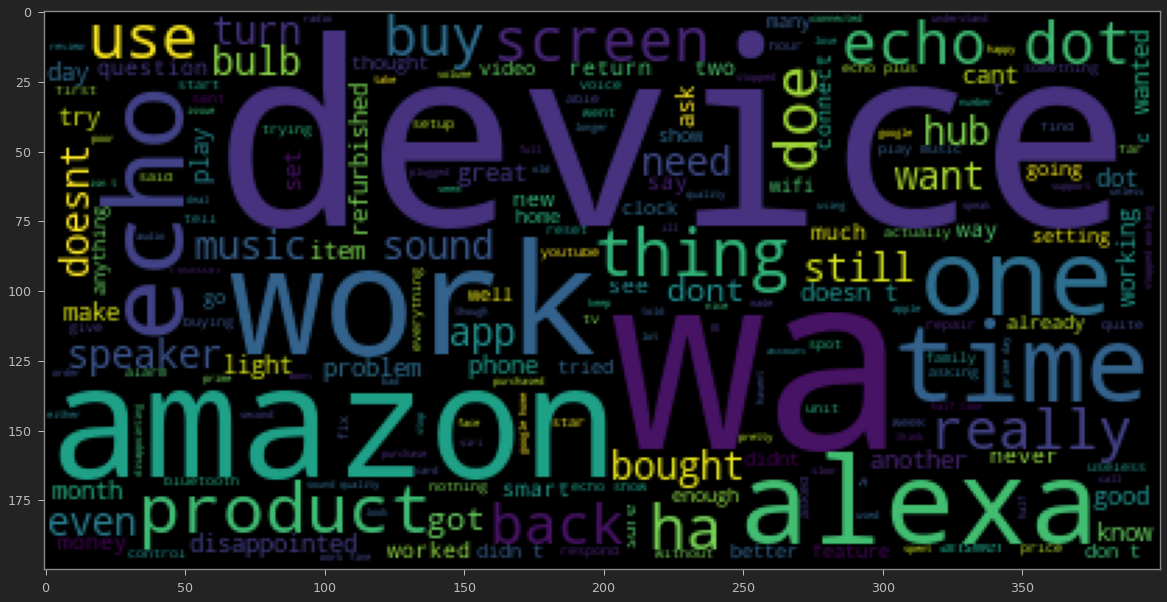

In [ ]:
sentences = negative['verified_reviews'].tolist()
len(sentences)
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

**MINI CHALLENGE #5 SOLUTION:** 
- **For the following text, create a pipeline to remove punctuations followed by removing stopwords and test the pipeline**
- **mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'**

In [ ]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'
challege = [ char for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations', 'text']

**MINI CHALLENGE #6 SOLUTION:**
- **Without doing any code, perform count vectorization for the following list:**
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
- **Confirm your answer with code**

In [ ]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

mini_challenge = ['Hello World', 'Hello Hello Hello World world', 'Hello Hello World world world World']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

[[1 1]
 [3 2]
 [2 4]]


**MINI CHALLENGE #7 SOLUTION:**
- **What is the shape of X and Y**

In [ ]:
X.shape

(3150, 3935)

In [ ]:
y.shape

(3150,)

**MINI CHALLENGE #8 SOLUTION:**
- **Train a logistic Regression classifier and assess its performance**

              precision    recall  f1-score   support

           0       0.63      0.40      0.49        42
           1       0.96      0.98      0.97       588

    accuracy                           0.94       630
   macro avg       0.79      0.69      0.73       630
weighted avg       0.94      0.94      0.94       630



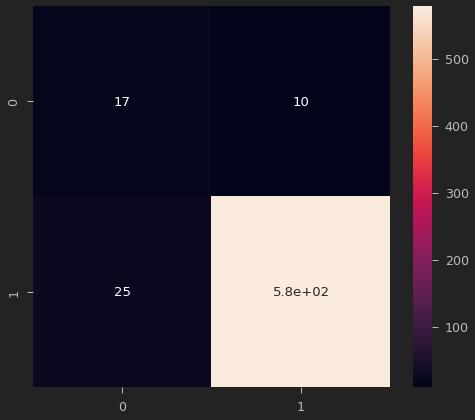

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

# Excellent Job!

# LDA PART

In [ ]:
import spacy  # for our NLP processing
import nltk  # to use the stopwords library
import string  # for a list of all punctuation
from nltk.corpus import stopwords  # for a list of stopwords
import gensim
from sklearn.manifold import TSNE
import pathlib
import pandas as pd
from wordcloud import STOPWORDS
import re
import json

In [ ]:

# Now we can load and use spacy to analyse our reviews
nlp = spacy.load("en_core_web_sm")


def format_topics_sentences(ldamodel, corpus, texts, dates):
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(
                    pd.Series([int(topic_num), round(prop_topic, 4), topic_keywords]),
                    ignore_index=True,
                )
            else:
                break
    sent_topics_df.columns = ["Dominant_Topic", "Perc_Contribution", "Topic_Keywords"]

    # Add original text to the end of the output
    contents = pd.Series(texts)

    sent_topics_df = pd.concat([sent_topics_df, contents, pd.Series(dates)], axis=1)
    return sent_topics_df


def lda_analysis(df, stop_words):
    
    def cleanup_text(doc):
        doc = nlp(doc, disable=["parser", "ner"])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != "-PRON-"]
        tokens = [
            tok for tok in tokens if tok not in stop_words and tok not in punctuations
        ]
        return tokens

    # Clean up and take only rows where we have text
    df = df[pd.notnull(df["verified_reviews"])]
    docs = list(df["verified_reviews"].values)

    punctuations = string.punctuation

    processed_docs = list(map(cleanup_text, docs))
    print("len(processed_docs)", len(processed_docs))
    if len(processed_docs) < 11:
        print("INSUFFICIENT DOCS TO RUN LINEAR DISCRIMINANT ANALYSIS")
        return (None, None, None, None)

    dictionary = gensim.corpora.Dictionary(processed_docs)
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    print("len(bow_corpus)", len(bow_corpus))
    print("dictionary", len(list(dictionary.keys())))
    if len(list(dictionary.keys())) < 1:
        print("INSUFFICIENT DICTS TO RUN LINEAR DISCRIMINANT ANALYSIS")
        return (None, None, None, None)

    lda_model = gensim.models.LdaModel(
        bow_corpus, num_topics=5, id2word=dictionary, passes=10
    )

    df_topic_sents_keywords = format_topics_sentences(
        ldamodel=lda_model,
        corpus=bow_corpus,
        texts=docs,
        dates=list(df["Date received"].values),
    )
    print("len(df_topic_sents_keywords)", len(df_topic_sents_keywords))
    print("df_topic_sents_keywords.head()", df_topic_sents_keywords.head())
    df_dominant_topic = df_topic_sents_keywords.reset_index()
    df_dominant_topic.columns = [
        "Document_No",
        "Dominant_Topic",
        "Topic_Perc_Contrib",
        "Keywords",
        "Text",
        "Date",
    ]

    topic_num, tsne_lda = tsne_analysis(lda_model, bow_corpus)

    return (tsne_lda, lda_model, topic_num, df_dominant_topic)


def tsne_analysis(ldamodel, corpus):
    topic_weights = []
    for i, row_list in enumerate(ldamodel[corpus]):
        topic_weights.append([w for i, w in row_list])

    # Array of topic weights
    df_topics = pd.DataFrame(topic_weights).fillna(0).values



    # Dominant topic number in each doc
    topic_nums = np.argmax(df_topics, axis=1)

    # tSNE Dimension Reduction
    try:
        tsne_model = TSNE(
            n_components=2, verbose=1, random_state=0, angle=0.99, init="pca"
        )
        tsne_lda = tsne_model.fit_transform(df_topics)
    except:
        print("TSNE_ANALYSIS WENT WRONG, PLEASE RE-CHECK YOUR DATASET")
        return (topic_nums, None)

    return (topic_nums, tsne_lda)

In [ ]:
GLOBAL_DF = reviews_df.copy()

ADDITIONAL_STOPWORDS = [
    "XXXX",
    "XX",
    "xx",
    "xxxx",
    "n't"
]
for stopword in ADDITIONAL_STOPWORDS:
    STOPWORDS.add(stopword)

def add_stopwords(selected_bank):

    selected_bank_words = re.findall(r"[\w']+", selected_bank)
    for word in selected_bank_words:
        STOPWORDS.add(word.lower())

    print("Added %s stopwords:" % selected_bank)
    for word in selected_bank_words:
        print("\t", word)
    return STOPWORDS

def precompute_all_lda():
    """ QD function for precomputing all necessary LDA results
     to allow much faster load times when the app runs. """

    failed_banks = []
    counter = 0
    bank_names = GLOBAL_DF["variation"].value_counts().keys().tolist()
    results = {}

    for bank in bank_names:
        try:
            print("crunching LDA for: ", bank)
            add_stopwords(bank)
            bank_df = GLOBAL_DF[GLOBAL_DF["variation"] == bank]
            tsne_lda, lda_model, topic_num, df_dominant_topic = lda_analysis(
                bank_df, list(STOPWORDS)
            )

            topic_top3words = [
                (i, topic)
                for i, topics in lda_model.show_topics(formatted=False)
                for j, (topic, wt) in enumerate(topics)
                if j < 3
            ]

            df_top3words_stacked = pd.DataFrame(
                topic_top3words, columns=["topic_id", "words"]
            )
            df_top3words = df_top3words_stacked.groupby("topic_id").agg(", \n".join)
            df_top3words.reset_index(level=0, inplace=True)

            # print(len(tsne_lda))
            # print(len(df_dominant_topic))
            tsne_df = pd.DataFrame(
                {
                    "tsne_x": tsne_lda[:, 0],
                    "tsne_y": tsne_lda[:, 1],
                    "topic_num": topic_num,
                    "doc_num": df_dominant_topic["Document_No"],
                }
            )

            topic_top3words = [
                (i, topic)
                for i, topics in lda_model.show_topics(formatted=False)
                for j, (topic, wt) in enumerate(topics)
                if j < 3
            ]

            df_top3words_stacked = pd.DataFrame(
                topic_top3words, columns=["topic_id", "words"]
            )
            df_top3words = df_top3words_stacked.groupby("topic_id").agg(", \n".join)
            df_top3words.reset_index(level=0, inplace=True)

            results[str(bank)] = {
                "df_top3words": df_top3words.to_json(),
                "tsne_df": tsne_df.to_json(),
                "df_dominant_topic": df_dominant_topic.to_json(),
            }

            counter += 1
        except:
            print("SOMETHING WENT HORRIBLY WRONG WITH : ", bank)
            failed_banks.append(bank)

    with open("/content/drive/MyDrive/Dash_plotly_home/precomputed.json", "w+") as res_file:
        json.dump(results, res_file)

    print("DONE")
    print("did %d variations" % counter)
    print("failed %d:" % len(failed_banks))
    for fail in failed_banks:
        print(fail)   

In [ ]:
precompute_all_lda()

crunching LDA for:  Black  Dot
Added Black  Dot stopwords:
	 Black
	 Dot
len(processed_docs) 516
len(bow_corpus) 516
dictionary 811
len(df_topic_sents_keywords) 516
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             2.0             0.9459   
1             2.0             0.7330   
2             4.0             0.9318   
3             3.0             0.7315   
4             0.0             0.2000   

                                      Topic_Keywords  \
0  great, music, work, play, product, easy, love,...   
1  great, music, work, play, product, easy, love,...   
2  alexa, love, speaker, wa, loud, time, ask, wit...   
3  love, device, still, speaker, one, little, add...   
4  echo, speaker, sound, great, work, quality, go...   

                                                   0          1  
0  set play home theater system fat using weather... 2018-07-31  
1                                     beyond awesome 2018-07-31  
2  like responds every time 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.701988
[t-SNE] KL divergence after 1000 iterations: 0.121314
crunching LDA for:  Charcoal Fabric 
Added Charcoal Fabric  stopwords:
	 Charcoal
	 Fabric
len(processed_docs) 430
len(bow_corpus) 430
dictionary 709
len(df_topic_sents_keywords) 430
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             0.0             0.7305   
1             0.0             0.5966   
2             0.0             0.6003   
3             1.0             0.5935   
4             0.0             0.9608   

                                      Topic_Keywords  \
0  love, echo, music, use, alexa, still, learn, t...   
1  love, echo, music, use, alexa, still, learn, t...   
2  love, echo, music, use, alexa, still, learn, t...   
3  music, alexa, play, use, buy, prime, ask, fun,...   
4  love, echo, music, use, alexa, still, learn, t...   

                                                   0          1  
0         

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.723663
[t-SNE] KL divergence after 1000 iterations: 0.087372
crunching LDA for:  Configuration: Fire TV Stick
Added Configuration: Fire TV Stick stopwords:
	 Configuration
	 Fire
	 TV
	 Stick
len(processed_docs) 350
len(bow_corpus) 350
dictionary 783
len(df_topic_sents_keywords) 350
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             0.0             0.7340   
1             1.0             0.9317   
2             1.0             0.7292   
3             2.0             0.7997   
4             0.0             0.2000   

                                      Topic_Keywords  \
0  easy, use, love, buy, one, show, app, amazon, ...   
1  love, use, easy, great, work, remote, wa, voic...   
2  love, use, easy, great, work, remote, wa, voic...   
3  watch, well, work, easy, wish, show, know, tim...   
4  easy, use, love, buy, one, show, app, amazon, ...   

                                    

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.790958
[t-SNE] KL divergence after 850 iterations: 0.108521
crunching LDA for:  Black  Plus
Added Black  Plus stopwords:
	 Black
	 Plus
len(processed_docs) 270
len(bow_corpus) 270
dictionary 1155
len(df_topic_sents_keywords) 270
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             4.0             0.7811   
1             0.0             0.9455   
2             3.0             0.9378   
3             4.0             0.9456   
4             1.0             0.7972   

                                      Topic_Keywords  \
0  echo, device, hub, great, sound, home, alexa, ...   
1  bulb, light, echo, hue, hub, use, come, bridge...   
2  echo, alexa, love, wa, amazon, smart, work, co...   
3  echo, device, hub, great, sound, home, alexa, ...   
4  love, alexa, echo, wa, great, time, app, set, ...   

                                                   0          1  
0  use alexa primarily li

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.541054
[t-SNE] KL divergence after 800 iterations: 0.084859
crunching LDA for:  Black  Show
Added Black  Show stopwords:
	 Black
	 Show
len(processed_docs) 265
len(bow_corpus) 265
dictionary 991
len(df_topic_sents_keywords) 265
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             0.0             0.9186   
1             3.0             0.9367   
2             2.0             0.9768   
3             0.0             0.8510   
4             3.0             0.5993   

                                      Topic_Keywords  \
0  love, echo, great, music, use, screen, fun, al...   
1  good, great, video, love, use, product, alexa,...   
2  work, well, great, device, echo, use, easy, lo...   
3  love, echo, great, music, use, screen, fun, al...   
4  good, great, video, love, use, product, alexa,...   

                                                   0          1  
0  love love love love fee

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.083878
[t-SNE] KL divergence after 900 iterations: 0.080517
crunching LDA for:  Black
Added Black stopwords:
	 Black
len(processed_docs) 261
len(bow_corpus) 261
dictionary 860
len(df_topic_sents_keywords) 261
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             1.0             0.9259   
1             0.0             0.9374   
2             1.0             0.8638   
3             4.0             0.8644   
4             1.0             0.7320   

                                      Topic_Keywords  \
0  work, great, buy, refurbish, love, echo, new, ...   
1  great, buy, refurbish, product, new, love, wor...   
2  work, great, buy, refurbish, love, echo, new, ...   
3  wa, echo, alexa, work, device, well, use, ha, ...   
4  work, great, buy, refurbish, love, echo, new, ...   

                                                   0          1  
0  item longer work month use connect wifi un

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.311455
[t-SNE] KL divergence after 850 iterations: 0.102343
crunching LDA for:  Black  Spot
Added Black  Spot stopwords:
	 Black
	 Spot
len(processed_docs) 241
len(bow_corpus) 241
dictionary 1109
len(df_topic_sents_keywords) 241
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             3.0             0.8985   
1             3.0             0.7981   
2             3.0             0.6862   
3             0.0             0.9373   
4             1.0             0.9806   

                                      Topic_Keywords  \
0  love, echo, use, great, alexa, alarm, thing, m...   
1  love, echo, use, great, alexa, alarm, thing, m...   
2  love, echo, use, great, alexa, alarm, thing, m...   
3  alarm, alexa, use, cancel, love, clock, add, s...   
4  clock, screen, good, device, great, amazon, ro...   

                                                   0          1  
0        used product pho

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.550861
[t-SNE] KL divergence after 850 iterations: 0.098075
crunching LDA for:  White  Dot
Added White  Dot stopwords:
	 White
	 Dot
len(processed_docs) 184
len(bow_corpus) 184
dictionary 377
len(df_topic_sents_keywords) 184
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             4.0             0.9102   
1             4.0             0.7314   
2             4.0             0.5929   
3             4.0             0.7280   
4             2.0             0.7330   

                                      Topic_Keywords  \
0  love, play, music, great, one, time, echo, ale...   
1  love, play, music, great, one, time, echo, ale...   
2  love, play, music, great, one, time, echo, ale...   
3  love, play, music, great, one, time, echo, ale...   
4  easy, love, echo, use, set, music, good, produ...   

                                                   0          1  
0  small device kid like ask 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.418968
[t-SNE] KL divergence after 1000 iterations: 0.061257
crunching LDA for:  Heather Gray Fabric 
Added Heather Gray Fabric  stopwords:
	 Heather
	 Gray
	 Fabric
len(processed_docs) 157
len(bow_corpus) 157
dictionary 371
len(df_topic_sents_keywords) 157
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             1.0             0.9523   
1             4.0             0.7313   
2             4.0             0.9331   
3             4.0             0.7991   
4             4.0             0.8970   

                                      Topic_Keywords  \
0  alexa, love, play, music, control, echo, thing...   
1  love, great, speaker, echo, work, happy, music...   
2  love, great, speaker, echo, work, happy, music...   
3  love, great, speaker, echo, work, happy, music...   
4  love, great, speaker, echo, work, happy, music...   

                                                   0          

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.137146
[t-SNE] KL divergence after 900 iterations: 0.049616
crunching LDA for:  White  Spot
Added White  Spot stopwords:
	 White
	 Spot
len(processed_docs) 109
len(bow_corpus) 109
dictionary 748
len(df_topic_sents_keywords) 109
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             4.0             0.9595   
1             0.0             0.9847   
2             1.0             0.9489   
3             4.0             0.6804   
4             1.0             0.8836   

                                      Topic_Keywords  \
0  use, love, one, great, clock, device, turn, al...   
1  alexa, echo, screen, time, well, answer, easy,...   
2  echo, love, clock, screen, product, play, grea...   
3  use, love, one, great, clock, device, turn, al...   
4  echo, love, clock, screen, product, play, grea...   

                                                   0          1  
0  don’t use much thought 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.076073
[t-SNE] KL divergence after 700 iterations: 0.046377
crunching LDA for:  White
Added White stopwords:
	 White
len(processed_docs) 91
len(bow_corpus) 91
dictionary 425
len(df_topic_sents_keywords) 91
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             1.0             0.9675   
1             1.0             0.7268   
2             4.0             0.9380   
3             3.0             0.9464   
4             1.0             0.8647   

                                      Topic_Keywords  \
0  one, buy, work, wa, alexa, love, new, good, re...   
1  one, buy, work, wa, alexa, love, new, good, re...   
2  love, work, talk, purchase, echo, refurbish, n...   
3  new, buy, wa, amazon, refurbish, echo, say, al...   
4  one, buy, work, wa, alexa, love, new, good, re...   

                                                   0          1  
0  love volume could definitely use boost better

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.697460
[t-SNE] KL divergence after 1000 iterations: 0.053932
crunching LDA for:  Sandstone Fabric 
Added Sandstone Fabric  stopwords:
	 Sandstone
	 Fabric
len(processed_docs) 90
len(bow_corpus) 90
dictionary 292
len(df_topic_sents_keywords) 90
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             4.0             0.9763   
1             3.0             0.9776   
2             2.0             0.9462   
3             2.0             0.7322   
4             1.0             0.9109   

                                      Topic_Keywords  \
0  work, great, learn, use, fun, wa, alexa, alarm...   
1  echo, love, great, music, sound, wa, well, abl...   
2  music, use, sound, alexa, impressed, great, re...   
3  music, use, sound, alexa, impressed, great, re...   
4  echo, great, love, still, sound, learn, work, ...   

                                                   0          1  
0  without

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.482262
[t-SNE] KL divergence after 900 iterations: 0.307073
crunching LDA for:  White  Show
Added White  Show stopwords:
	 White
	 Show
len(processed_docs) 85
len(bow_corpus) 85
dictionary 507
len(df_topic_sents_keywords) 85
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             4.0             0.7327   
1             2.0             0.5999   
2             3.0             0.9191   
3             1.0             0.9376   
4             0.0             0.2000   

                                      Topic_Keywords  \
0  home, screen, echo, much, spam, amazon, turn, ...   
1  great, love, sound, echo, ha, work, highly, te...   
2  love, echo, see, learn, well, alexa, thing, mu...   
3  use, alexa, great, video, echo, good, play, on...   
4  echo, device, love, screen, family, recommend,...   

                                                   0          1  
0                            

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 1000 iterations: 0.275651
crunching LDA for:  White  Plus
Added White  Plus stopwords:
	 White
	 Plus
len(processed_docs) 78
len(bow_corpus) 78
dictionary 598
len(df_topic_sents_keywords) 78
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             0.0             0.9422   
1             1.0             0.9101   
2             4.0             0.8378   
3             1.0             0.9592   
4             1.0             0.8985   

                                      Topic_Keywords  \
0  alexa, device, work, hub, learn, great, anothe...   
1  sound, love, wa, work, great, echo, set, speak...   
2  echo, hub, amazon, love, light, use, buy, find...   
3  sound, love, wa, work, great, echo, set, speak...   
4  sound, love, wa, work, great, echo, set, speak...   

                                                   0          1  
0  great speaker n love much alexa tap it’s defin... 2018-07-30  
1  like built hub plus unit sound great 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 1000 iterations: 0.265985
crunching LDA for:  Oak Finish 
Added Oak Finish  stopwords:
	 Oak
	 Finish
len(processed_docs) 14
len(bow_corpus) 14
dictionary 50
len(df_topic_sents_keywords) 14
df_topic_sents_keywords.head()    Dominant_Topic  Perc_Contribution  \
0             4.0             0.9619   
1             1.0             0.6000   
2             0.0             0.8397   
3             3.0             0.9724   
4             1.0             0.7333   

                                      Topic_Keywords  \
0  problem, try, enjoy, little, didshe, purchase,...   
1  versatile, fun, echo, love, expect, entertainm...   
2  love, friend, alexa, buy, entertainment, great...   
3  connection, product, play, music, great, issue...   
4  versatile, fun, echo, love, expect, entertainm...   

                                                   0          1  
0  purchased mother knee problem give something t... 2018-07-30  
1                                        

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.748177
[t-SNE] KL divergence after 1000 iterations: -0.219130
crunching LDA for:  Walnut Finish 
Added Walnut Finish  stopwords:
	 Walnut
	 Finish
len(processed_docs) 9
INSUFFICIENT DOCS TO RUN LINEAR DISCRIMINANT ANALYSIS
SOMETHING WENT HORRIBLY WRONG WITH :  Walnut Finish 
DONE
did 15 variations
failed 1:
Walnut Finish 


# EMBEDDING VECTORS PART

In [ ]:
vects_df = embed_df.copy()

In [ ]:
#words converted to sentences by tfidf weights.
#Step 1. Prepare data
#step 2. Have bogus word2vec (of the size of our vocab)
#Step 3. Calculate a column containing word2vec for sentences

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(vects_df.bigram).todense()
vocab = tfidf.vocabulary_
vocab

{'turn_light': 18,
 'echo_dot': 4,
 'still_learning': 17,
 'love_echo': 11,
 'work_well': 21,
 'easy_set': 3,
 'work_great': 20,
 'wa_easy': 19,
 'great_product': 7,
 'play_music': 13,
 'great_love': 6,
 'sound_quality': 16,
 'love_alexa': 10,
 'great_sound': 8,
 'prime_day': 15,
 'playing_music': 14,
 'amazon_prime': 1,
 'amazon_music': 0,
 'even_though': 5,
 'listen_music': 9,
 'dont_know': 2,
 'much_better': 12}

In [ ]:
word2vec = np.random.randn(len(vocab),300)

In [ ]:
sent2vec_matrix = np.dot(tfidf_matrix, word2vec) # word2vec here contains vectors in the same order as in vocab
vects_df["ngram2vec"] = sent2vec_matrix.tolist()

In [ ]:
vects_df

,bigram,count,words,ngram2vec
19683,turn_light,13,13,"[-0.2969742938879041, -0.3256781410475976, 1.9..."
5511,echo_dot,13,13,"[1.541396583146711, 0.35743956514995434, -1.51..."
18237,still_learning,13,13,"[1.5856769156309125, -0.07232808138125343, 1.2..."
11367,love_echo,13,13,"[-0.6540930228804863, -0.42564952988694105, 0...."
21911,work_well,13,13,"[0.20045119162830172, -0.032865207518675034, 1..."
5454,easy_set,13,13,"[1.3230035226314125, 1.4954787531505538, 0.639..."
21836,work_great,13,13,"[-2.0537939696141434, -1.763342040988249, 0.32..."
20810,wa_easy,12,12,"[0.7857105007461718, -0.9580418825093465, -0.4..."
8216,great_product,12,12,"[-0.8826124193279845, -0.0986805364280063, 0.7..."
14070,play_music,12,12,"[-0.6675738302843541, -0.4278180832436861, -0...."


In [ ]:
vects_df = vects_df.ngram2vec.apply(pd.Series) #split horizontally 

In [ ]:
print(type(vects_df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
vects_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
19683,-0.296974,-0.325678,1.973258,0.555961,0.284374,-0.050483,0.076452,-0.351941,2.097366,0.223436,...,0.714346,0.061768,1.050988,0.290010,-0.357783,0.510698,-0.644410,-0.711561,0.122305,-0.369136
5511,1.541397,0.357440,-1.515595,0.789620,-0.861740,0.959831,-1.051716,1.673353,1.317149,-0.536613,...,-2.327121,1.049624,-0.100758,2.240858,1.706048,0.536768,0.802087,-0.281522,1.654126,-0.308274
18237,1.585677,-0.072328,1.294485,0.792837,-0.049519,-0.570102,0.591479,0.463926,-1.498416,0.248955,...,0.774707,2.034918,-0.238151,1.459111,1.171603,-1.208496,0.242827,-0.045075,1.192632,-0.685072
11367,-0.654093,-0.425650,0.631371,0.661395,-1.054283,-1.023058,-0.408735,-0.839123,0.164352,0.547993,...,1.299423,-1.852376,0.484201,2.415982,-1.602703,-1.258232,-1.849876,-1.505501,-0.547477,0.197907
21911,0.200451,-0.032865,1.256345,-0.866895,0.174219,-0.108533,-0.894925,-1.332415,0.025147,-0.063072,...,1.225611,0.349221,1.253074,0.758848,-0.762963,-0.693090,2.001938,-1.029418,-0.712133,1.187024
5454,1.323004,1.495479,0.639614,-0.753017,-0.349161,-1.835007,1.111901,-0.682540,0.541556,0.558889,...,0.059121,0.706077,-1.291568,0.411962,-1.066387,0.439692,0.023242,1.544107,0.003031,-1.741851
21836,-2.053794,-1.763342,0.325804,-1.286824,1.499863,-1.454499,0.132995,-0.853786,-1.393328,-0.577880,...,0.310093,-0.320714,-1.074164,0.238648,0.441244,0.606110,-1.451987,0.821101,-1.589670,0.924431
20810,0.785711,-0.958042,-0.455065,1.908218,-0.996968,0.047667,0.669676,1.145578,0.696959,-0.115374,...,-1.633339,0.249066,0.135978,0.396612,0.143717,0.128463,0.058561,-1.182813,0.380939,0.126343
8216,-0.882612,-0.098681,0.773742,-0.750578,0.859722,0.252434,-0.359112,0.272067,1.312649,-1.126831,...,0.818159,-1.171873,0.629659,0.077100,0.560430,-0.943560,0.761967,-1.273715,-2.154565,-0.236400
14070,-0.667574,-0.427818,-0.337490,-2.423216,-0.345172,-1.129136,0.535360,-0.310691,1.062540,-0.751530,...,0.966916,-0.632747,-0.754347,-1.736647,1.472276,1.253311,-0.211451,0.490834,-1.848700,-2.261379


In [ ]:
from google.colab import files

vects_df.to_csv('/content/drive/MyDrive/Dash_plotly_home/vects_df_n.csv',index = False)
files.download('/content/drive/MyDrive/Dash_plotly_home/vects_df_n.csv')
!cp -r "/content/drive/MyDrive/Dash_plotly_home/vects_df_n.csv" "/content/drive/MyDrive/Dash_plotly_home/"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

cp: '/content/drive/MyDrive/Dash_plotly_home/vects_df_n.csv' and '/content/drive/MyDrive/Dash_plotly_home/vects_df_n.csv' are the same file


# DASH PART

In [ ]:
!pip install dash pip install emoji
!pip install dash_bootstrap_components
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=bb3fc58d4dd4e7480408e9aee4c6cf4e4a1a4d69fb897c9ec98e1337bd08d53f
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 KB 8.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#since we are using google colab/jupyter we should use JupyterDash
import dash_bootstrap_components as dbc
from jupyter_dash import JupyterDash
import dash
from dash.dependencies import Input, Output
import dash_table
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import numpy as np 
import plotly.graph_objs as go
import emoji
import pandas as pd
import plotly
from plotly.offline import iplot
from plotly.offline import init_notebook_mode, iplot
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf
init_notebook_mode(connected=True)
import plotly.express as px
from dash.dependencies import Output, Input, State
from dateutil import relativedelta
from wordcloud import WordCloud, STOPWORDS
from sklearn.manifold import TSNE
import pathlib
import json
import pathlib
import re
import json
from datetime import datetime
import flask

<ipython-input-100-e6fdbc45c425>:6: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table
<ipython-input-100-e6fdbc45c425>:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-100-e6fdbc45c425>:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
#app = dash.Dash(__name__)   #,server= server , routes_pathname_prefix='/dash/' 
app = JupyterDash(__name__)  #since we are using google colab/jupyter we should use JupyterDash
 
#app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
#server = app.server  # for Heroku deployment

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Dash_plotly_home"
EXTERNAL_STYLESHEETS = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]
FILENAME_PRECOMPUTED = "/precomputed.json"
PLOTLY_LOGO = "https://images.plot.ly/logo/new-branding/plotly-logomark.png"
with open("/content/drive/MyDrive/Dash_plotly_home/precomputed.json") as precomputed_file:
    PRECOMPUTED_LDA = json.load(precomputed_file)

GLOBAL_DF1 = reviews_df
"""
We are casting the whole column to datetime to make life easier in the rest of the code.
It isn't a terribly expensive operation so for the sake of tidyness we went this way.
"""
GLOBAL_DF["Date received"] = pd.to_datetime(
    GLOBAL_DF["Date received"], format="%m/%d/%Y"
)

"""
In order to make the graphs more useful we decided to prevent some words from being included
"""
ADDITIONAL_STOPWORDS = [
    "XXXX",
    "XX",
    "xx",
    "xxxx",
    "n't",
]
for stopword in ADDITIONAL_STOPWORDS:
    STOPWORDS.add(stopword)

In [ ]:
def sample_data(dataframe, float_percent):
    """
    Returns a subset of the provided dataframe.
    The sampling is evenly distributed and reproducible
    """
    print("making a local_df data sample with float_percent: %s" % (float_percent))
    return dataframe.sample(frac=float_percent, random_state=1)


def get_complaint_count_by_company(dataframe):
    """ Helper function to get review counts for unique variations """
    company_counts = dataframe["variation"].value_counts()
    # we filter out all banks with less than 11 reviews for now
    company_counts = company_counts[company_counts > 10]
    values = company_counts.keys().tolist()
    counts = company_counts.tolist()
    return values, counts


def calculate_bank_sample_data(dataframe, sample_size, time_values):
    """ TODO """
    print(
        "making reviews_sample_data with sample_size count: %s and time_values: %s"
        % (sample_size, time_values)
    )
    if time_values is not None:
        min_date = time_values[0]
        max_date = time_values[1]
        dataframe = dataframe[
            (dataframe["Date received"] >= min_date)
            & (dataframe["Date received"] <= max_date)
        ]
    company_counts = dataframe["variation"].value_counts()
    company_counts_sample = company_counts[:sample_size]
    values_sample = company_counts_sample.keys().tolist()
    counts_sample = company_counts_sample.tolist()

    return values_sample, counts_sample


def make_local_df(selected_bank, time_values, n_selection):
    """ TODO """
    print("redrawing dataset-wordcloud...")
    n_float = float(n_selection / 100)
    print("got time window:", str(time_values))
    print("got n_selection:", str(n_selection), str(n_float))
    # sample the dataset according to the slider
    local_df = sample_data(reviews_df, n_float)
    if time_values is not None:
        time_values = time_slider_to_date(time_values)
        local_df = local_df[
            (local_df["Date received"] >= time_values[0])
            & (local_df["Date received"] <= time_values[1])
        ]
    if selected_bank:
        local_df = local_df[local_df["variation"] == selected_bank]
        
    return local_df


def make_marks_time_slider(mini, maxi):
    """
    A helper function to generate a dictionary that should look something like:
    {1420066800: '2015', 1427839200: 'Q2', 1435701600: 'Q3', 1443650400: 'Q4',
    1451602800: '2016', 1459461600: 'Q2', 1467324000: 'Q3', 1475272800: 'Q4',
     1483225200: '2017', 1490997600: 'Q2', 1498860000: 'Q3', 1506808800: 'Q4'}
    """
    step = relativedelta.relativedelta(months=+1)
    start = datetime(year=mini.year, month=1, day=1)
    end = datetime(year=maxi.year, month=maxi.month, day=30)
    ret = {}

    current = start
    while current <= end:
        current_str = int(current.timestamp())
        if current.month == 1:
            ret[current_str] = {
                "label": str(current.year),
                "style": {"font-weight": "bold"},
            }
        elif current.month == 4:
            ret[current_str] = {
                "label": "Q2",
                "style": {"font-weight": "lighter", "font-size": 7},
            }
        elif current.month == 7:
            ret[current_str] = {
                "label": "Q3",
                "style": {"font-weight": "lighter", "font-size": 7},
            }
        elif current.month == 10:
            ret[current_str] = {
                "label": "Q4",
                "style": {"font-weight": "lighter", "font-size": 7},
            }
        else:
            pass
        current += step
    # print(ret)
    return ret


def time_slider_to_date(time_values):
    """ TODO """
    min_date = datetime.fromtimestamp(time_values[0]).strftime("%c")
    max_date = datetime.fromtimestamp(time_values[1]).strftime("%c")
    print("Converted time_values: ")
    print("\tmin_date:", time_values[0], "to: ", min_date)
    print("\tmax_date:", time_values[1], "to: ", max_date)
    return [min_date, max_date]


def make_options_bank_drop(values):
    """
    Helper function to generate the data format the dropdown dash component wants
    """
    ret = []
    for value in values:
        ret.append({"label": value, "value": value})
    return ret

import matplotlib.colors as mcolors
def populate_lda_scatter(tsne_df, df_top3words, df_dominant_topic):
    """Calculates LDA and returns figure data you can jam into a dcc.Graph()"""
    mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

    # for each topic we create a separate trace
    traces = []
    for topic_id in df_top3words["topic_id"]:
        tsne_df_f = tsne_df[tsne_df.topic_num == topic_id]
        cluster_name = ", ".join(
            df_top3words[df_top3words["topic_id"] == topic_id]["words"].to_list()
        )
        trace = go.Scatter(
            name=cluster_name,
            x=tsne_df_f["tsne_x"],
            y=tsne_df_f["tsne_y"],
            mode="markers",
            hovertext=tsne_df_f["doc_num"],
            marker=dict(
                size=6,
                color=mycolors[tsne_df_f["topic_num"]],  # set color equal to a variable
                colorscale="Viridis",
                showscale=False,
            ),
        )
        traces.append(trace)

    layout = go.Layout({"title": "Topic analysis using LDA"})

    return {"data": traces, "layout": layout}


def plotly_wordcloud(data_frame):
    """A wonderful function that returns figure data for three equally
    wonderful plots: wordcloud, frequency histogram and treemap"""
    complaints_text = list(data_frame["verified_reviews"].dropna().values)

    if len(complaints_text) < 1:
        return {}, {}, {}

    # join all documents in corpus
    text = " ".join(list(complaints_text))

    word_cloud = WordCloud(stopwords=set(STOPWORDS), max_words=80, max_font_size=90)
    word_cloud.generate(text)

    word_list = []
    freq_list = []
    fontsize_list = []
    position_list = []
    orientation_list = []
    color_list = []

    for (word, freq), fontsize, position, orientation, color in word_cloud.layout_:
        word_list.append(word)
        freq_list.append(freq)
        fontsize_list.append(fontsize)
        position_list.append(position)
        orientation_list.append(orientation)
        color_list.append(color)

    # get the positions
    x_arr = []
    y_arr = []
    for i in position_list:
        x_arr.append(i[0])
        y_arr.append(i[1])

    # get the relative occurence frequencies
    new_freq_list = []
    for i in freq_list:
        new_freq_list.append(i * 80)

    trace = go.Scatter(
        x=x_arr,
        y=y_arr,
        textfont=dict(size=new_freq_list, color=color_list),
        hoverinfo="text",
        textposition="top center",
        hovertext=["{0} - {1}".format(w, f) for w, f in zip(word_list, freq_list)],
        mode="text",
        text=word_list,
    )

    layout = go.Layout(
        {
            "xaxis": {
                "showgrid": False,
                "showticklabels": False,
                "zeroline": False,
                "automargin": True,
                "range": [-100, 250],
            },
            "yaxis": {
                "showgrid": False,
                "showticklabels": False,
                "zeroline": False,
                "automargin": True,
                "range": [-100, 450],
            },
            "margin": dict(t=20, b=20, l=10, r=10, pad=4),
            "hovermode": "closest",
        }
    )

    wordcloud_figure_data = {"data": [trace], "layout": layout}
    word_list_top = word_list[:15]
    word_list_top.reverse()
    freq_list_top = freq_list[:15]
    freq_list_top.reverse()

    frequency_figure_data = {
        "data": [
            {
                "y": word_list_top,
                "x": freq_list_top,
                "type": "bar",
                "name": "",
                "orientation": "h",
            }
        ],
        "layout": {"height": "550", "margin": dict(t=20, b=20, l=100, r=20, pad=4)},
    }
    treemap_trace = go.Treemap(
        labels=word_list_top, parents=[""] * len(word_list_top), values=freq_list_top
    )
    treemap_layout = go.Layout({"margin": dict(t=10, b=10, l=5, r=5, pad=4)})
    treemap_figure = {"data": [treemap_trace], "layout": treemap_layout}
    return wordcloud_figure_data, frequency_figure_data, treemap_figure


"""
#  Page layout and contents
In an effort to clean up the code a bit, we decided to break it apart into
sections. For instance: LEFT_COLUMN is the input controls you see in that gray
box on the top left. The body variable is the overall structure which most other
sections go into. This just makes it ever so slightly easier to find the right
spot to add to or change without having to count too many brackets.
"""


'\n#  Page layout and contents\nIn an effort to clean up the code a bit, we decided to break it apart into\nsections. For instance: LEFT_COLUMN is the input controls you see in that gray\nbox on the top left. The body variable is the overall structure which most other\nsections go into. This just makes it ever so slightly easier to find the right\nspot to add to or change without having to count too many brackets.\n'

In [ ]:
NAVBAR = dbc.Navbar(
    children=[
        html.A(
            # Use row and col to control vertical alignment of logo / brand
            dbc.Row(
                [
                    dbc.Col(html.Img(src=PLOTLY_LOGO, height="30px")),
                    dbc.Col(
                        dbc.NavbarBrand("NLP DASHBOARD for reviews classification", className="ml-2")
                    ),
                ],
                align="center",
                
            ),
            href="https://plot.ly",
        )
    ],
    color="dark",
    dark=True,
    sticky="top",
)

LEFT_COLUMN = dbc.Col(html.Div(
    [
        html.H4(children="Select a variation & dataset size", className="display-5"),
        html.Hr(className="my-2"),
        html.Label("Select percentage of dataset", className="lead"),
        html.P(
            "(Lower is faster. Higher is more precise)",
            style={"fontSize": 10, "font-weight": "lighter"},
        ),
        dcc.Slider(
            id="n-selection-slider",
            min=1,
            max=100,
            step=1,
            marks={
                0: "0%",
                10: "",
                20: "20%",
                30: "",
                40: "40%",
                50: "",
                60: "60%",
                70: "",
                80: "80%",
                90: "",
                100: "100%",
            },
            value=20,
        ),
        html.Label("Select a variation", style={"marginTop": 50}, className="lead"),
        html.P(
            "(You can use the dropdown or click the barchart on the right)",
            style={"fontSize": 10, "font-weight": "lighter"},
        ),
        dcc.Dropdown(
            id="bank-drop", clearable=False, style={"marginBottom": 50, "font-size": 12}
        ),
        html.Label("Select time frame", className="lead"),
        html.Div(dcc.RangeSlider(id="time-window-slider"), style={"marginBottom": 50}),
        html.P(
            "(You can define the time frame down to month granularity)",
            style={"fontSize": 10, "font-weight": "lighter"},
        ),
    ])
)

LDA_PLOT = dcc.Loading(
    id="loading-lda-plot", children=[dcc.Graph(id="tsne-lda")], type="default"
)
LDA_TABLE = html.Div(
    id="lda-table-block",
    children=[
        dcc.Loading(
            id="loading-lda-table",
            children=[
                dash_table.DataTable(
                    id="lda-table",
                    style_cell_conditional=[
                        {
                            "if": {"column_id": "Text"},
                            "textAlign": "left",
                            "whiteSpace": "normal",
                            "height": "auto",
                            "min-width": "50%",
                        }
                    ],
                    style_data_conditional=[
                        {
                            "if": {"row_index": "odd"},
                            "backgroundColor": "rgb(243, 246, 251)",
                        }
                    ],
                    style_cell={
                        "padding": "16px",
                        "whiteSpace": "normal",
                        "height": "auto",
                        "max-width": "0",
                    },
                    style_header={"backgroundColor": "white", "fontWeight": "bold"},
                    style_data={"whiteSpace": "normal", "height": "auto"},
                    filter_action="native",
                    page_action="native",
                    page_current=0,
                    page_size=5,
                    columns=[],
                    data=[],
                )
            ],
            type="default",
        )
    ],
    style={"display": "none"},
)

LDA_PLOTS = [
    dbc.CardHeader(html.H5("Topic modelling using LDA")),
    dbc.Alert(
        "Not enough data to render LDA plots, please adjust the filters",
        id="no-data-alert-lda",
        color="warning",
        style={"display": "none"},
    ),
    dbc.CardBody(
        [
            html.P(
                "Click on a review point in the scatter to explore that specific reveiw",
                className="mb-0",
            ),
            html.P(
                "(not affected by sample size or time frame selection)",
                style={"fontSize": 10, "font-weight": "lighter"},
            ),
            LDA_PLOT,
            html.Hr(),
            LDA_TABLE,
        ]
    ),
]
WORDCLOUD_PLOTS = [
    dbc.CardHeader(html.H5("Most frequently used words in reviews")),
    dbc.Alert(
        "Not enough data to render these plots, please adjust the filters",
        id="no-data-alert",
        color="warning",
        style={"display": "none"},
    ),
    dbc.CardBody(
        [
            dbc.Row(
                [
                    dbc.Col(
                        dcc.Loading(
                            id="loading-frequencies",
                            children=[dcc.Graph(id="frequency_figure")],
                            type="default",
                        )
                    ),
                    dbc.Col(
                        [
                            dcc.Tabs(
                                id="tabs",
                                children=[
                                    dcc.Tab(
                                        label="Treemap",
                                        children=[
                                            dcc.Loading(
                                                id="loading-treemap",
                                                children=[dcc.Graph(id="bank-treemap")],
                                                type="default",
                                            )
                                        ],
                                    ),
                                    dcc.Tab(
                                        label="Wordcloud",
                                        children=[
                                            dcc.Loading(
                                                id="loading-wordcloud",
                                                children=[
                                                    dcc.Graph(id="bank-wordcloud")
                                                ],
                                                type="default",
                                            )
                                        ],
                                    ),
                                ],
                            )
                        ],
                        md=8,
                    ),
                ]
            )
        ]
    ),
]

TOP_BANKS_PLOT = [
    dbc.CardHeader(html.H5("Top variations by number of verified reviews")),
    dbc.CardBody(
        [
            dcc.Loading(
                id="loading-banks-hist",
                children=[
                    dbc.Alert(
                        "Not enough data to render this plot, please adjust the filters",
                        id="no-data-alert-bank",
                        color="warning",
                        style={"display": "none"},
                    ),
                    dcc.Graph(id="bank-sample"),
                ],
                type="default",
            )
        ],
        style={"marginTop": 0, "marginBottom": 0},
    ),
]

TOP_BIGRAM_PLOT = [
    dbc.CardHeader(html.H5("Top bigrams found in the database")),
    dbc.CardBody(
        [
            dcc.Loading(
                id="loading-bigrams-scatter",
                children=[
                    dbc.Alert(
                        "Something's gone wrong! Give us a moment, but try loading this page again if problem persists.",
                        id="no-data-alert-bigrams",
                        color="warning",
                        style={"display": "none"},
                    ),
                    dbc.Row(
                        [
                            dbc.Col(html.P(["Choose a t-SNE perplexity value:"]), md=6),
                            dbc.Col(
                                [
                                    dcc.Dropdown(
                                        id="bigrams-perplex-dropdown",
                                        options=[
                                            {"label": str(i), "value": i}
                                            for i in range(3, 7)
                                        ],
                                        value=3,
                                    )
                                ],
                                md=3,
                            ),
                        ]
                    ),
                    dcc.Graph(id="bigrams-scatter"),
                ],
                type="default",
            )
        ],
        style={"marginTop": 0, "marginBottom": 0},
    ),
]

TOP_BIGRAM_COMPS = [
    dbc.CardHeader(html.H5("Comparison of bigrams for two variations")),
    dbc.CardBody(
        [
            dcc.Loading(
                id="loading-bigrams-comps",
                children=[
                    dbc.Alert(
                        "Something's gone wrong! Give us a moment, but try loading this page again if problem persists.",
                        id="no-data-alert-bigrams_comp",
                        color="warning",
                        style={"display": "none"},
                    ),
                    dbc.Row(
                        [
                            dbc.Col(html.P("Choose two variations to compare:"), md=12),
                            dbc.Col(
                                [
                                    dcc.Dropdown(
                                        id="bigrams-comp_1",
                                        options=[
                                            {"label": i, "value": i}
                                            for i in bigram_df.company.unique()
                                        ],
                                        value="Charcoal Fabric",
                                    )
                                ],
                                md=6,
                            ),
                            dbc.Col(
                                [
                                    dcc.Dropdown(
                                        id="bigrams-comp_2",
                                        options=[
                                            {"label": i, "value": i}
                                            for i in bigram_df.company.unique()
                                        ],
                                        value="Heather Gray Fabric",
                                    )
                                ],
                                md=6,
                            ),
                        ]
                    ),
                    dcc.Graph(id="bigrams-comps"),
                ],
                type="default",
            )
        ],
        style={"marginTop": 0, "marginBottom": 0},
    ),
]

BODY = dbc.Container(
    [
        dbc.Row([dbc.Col(dbc.Card(TOP_BIGRAM_COMPS)),], style={"marginTop": 30}),
        dbc.Row([dbc.Col(dbc.Card(TOP_BIGRAM_PLOT)),], style={"marginTop": 30}),
        dbc.Row(
            [
                dbc.Col(LEFT_COLUMN, md=4, align="center"),
                dbc.Col(dbc.Card(TOP_BANKS_PLOT), md=8),
            ],
            style={"marginTop": 30},
        ),
        dbc.Card(WORDCLOUD_PLOTS),
        dbc.Row([dbc.Col([dbc.Card(LDA_PLOTS)])], style={"marginTop": 50}),
    ],
    className="mt-12",
)


In [ ]:
app.layout = html.Div(children=[NAVBAR, BODY])

"""
#  Callbacks
"""


@app.callback(
    Output("bigrams-scatter", "figure"), [Input("bigrams-perplex-dropdown", "value")],
)
def populate_bigram_scatter(perplexity):
    X_embedded = TSNE(n_components=2, perplexity=perplexity).fit_transform(vects_df)

    embed_df["tsne_1"] = X_embedded[:, 0]
    embed_df["tsne_2"] = X_embedded[:, 1]
    fig = px.scatter(
        embed_df,
        x="tsne_1",
        y="tsne_2",
        hover_name="bigram",
        text="bigram",
        size="count",
        color="words",
        size_max=45,
        template="plotly_white",
        title="Bigram similarity and frequency",
        labels={"words": "Count<BR>(words)"},
        color_continuous_scale=px.colors.sequential.Sunsetdark,
    )
    fig.update_traces(marker=dict(line=dict(width=1, color="Gray")))
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)
    return fig


@app.callback(
    Output("bigrams-comps", "figure"),
    [Input("bigrams-comp_1", "value"), Input("bigrams-comp_2", "value")],
)
def comp_bigram_comparisons(comp_first, comp_second):
    comp_list = [comp_first, comp_second]
    temp_df = bigram_df[bigram_df.company.isin(comp_list)]
    temp_df.loc[temp_df.company == comp_list[-1], "value"] = -temp_df[
        temp_df.company == comp_list[-1]
    ].value.values

    fig = px.bar(
        temp_df,
        title="Comparison: " + comp_first + " | " + comp_second,
        x="ngram",
        y="value",
        color="company",
        template="plotly_white",
        color_discrete_sequence=px.colors.qualitative.Bold,
        labels={"company": "variat°:", "ngram": "N-Gram"},
        hover_data="",
    )
    fig.update_layout(legend=dict(x=0.1, y=1.1), legend_orientation="h")
    fig.update_yaxes(title="", showticklabels=False)
    fig.data[0]["hovertemplate"] = fig.data[0]["hovertemplate"][:-14]
    return fig


@app.callback(
    [
        Output("time-window-slider", "marks"),
        Output("time-window-slider", "min"),
        Output("time-window-slider", "max"),
        Output("time-window-slider", "step"),
        Output("time-window-slider", "value"),
    ],
    [Input("n-selection-slider", "value")],
)
def populate_time_slider(value):
    """
    Depending on our dataset, we need to populate the time-slider
    with different ranges. This function does that and returns the
    needed data to the time-window-slider.
    """
    value += 0
    min_date = reviews_df["Date received"].min()
    max_date = reviews_df["Date received"].max()

    marks = make_marks_time_slider(min_date, max_date)
    min_epoch = list(marks.keys())[0]
    max_epoch = list(marks.keys())[-1]

    return (
        marks,
        min_epoch,
        max_epoch,
        (max_epoch - min_epoch) / (len(list(marks.keys())) * 3),
        [min_epoch, max_epoch],
    )


@app.callback(
    Output("bank-drop", "options"),
    [Input("time-window-slider", "value"), Input("n-selection-slider", "value")],
)
def populate_bank_dropdown(time_values, n_value):
    """ TODO """
    print("variation-drop: TODO USE THE TIME VALUES AND N-SLIDER TO LIMIT THE DATASET")
    if time_values is not None:
        pass
    n_value += 1
    bank_names, counts = get_complaint_count_by_company(reviews_df)
    counts.append(1)
    return make_options_bank_drop(bank_names)


@app.callback(
    [Output("bank-sample", "figure"), Output("no-data-alert-bank", "style")],
    [Input("n-selection-slider", "value"), Input("time-window-slider", "value")],
)
def update_bank_sample_plot(n_value, time_values):
    """ TODO """
    print("redrawing variation-sample...")
    print("\tn is:", n_value)
    print("\ttime_values is:", time_values)
    if time_values is None:
        return [{}, {"display": "block"}]
    n_float = float(n_value / 100)
    bank_sample_count = 10
    local_df = sample_data(reviews_df, n_float)
    min_date, max_date = time_slider_to_date(time_values)
    values_sample, counts_sample = calculate_bank_sample_data(
        local_df, bank_sample_count, [min_date, max_date]
    )
    data = [
        {
            "x": values_sample,
            "y": counts_sample,
            "text": values_sample,
            "textposition": "auto",
            "type": "bar",
            "name": "",
        }
    ]
    layout = {
        "autosize": False,
        "margin": dict(t=10, b=10, l=40, r=0, pad=4),
        "xaxis": {"showticklabels": False},
    }
    print("redrawing variation-sample...done")
    return [{"data": data, "layout": layout}, {"display": "none"}]


@app.callback(
    [
        Output("lda-table", "data"),
        Output("lda-table", "columns"),
        Output("tsne-lda", "figure"),
        Output("no-data-alert-lda", "style"),
    ],
    [Input("bank-drop", "value"), Input("time-window-slider", "value")],
)
def update_lda_table(selected_bank, time_values):
    """ Update LDA table and scatter plot based on precomputed data """

    if selected_bank in PRECOMPUTED_LDA:
        df_dominant_topic = pd.read_json(
            PRECOMPUTED_LDA[selected_bank]["df_dominant_topic"]
        )
        tsne_df = pd.read_json(PRECOMPUTED_LDA[selected_bank]["tsne_df"])
        df_top3words = pd.read_json(PRECOMPUTED_LDA[selected_bank]["df_top3words"])
    else:
        return [[], [], {}, {}]

    lda_scatter_figure = populate_lda_scatter(tsne_df, df_top3words, df_dominant_topic)

    columns = [{"name": i, "id": i} for i in df_dominant_topic.columns]
    data = df_dominant_topic.to_dict("records")

    return (data, columns, lda_scatter_figure, {"display": "none"})


@app.callback(
    [
        Output("bank-wordcloud", "figure"),
        Output("frequency_figure", "figure"),
        Output("bank-treemap", "figure"),
        Output("no-data-alert", "style"),
    ],
    [
        Input("bank-drop", "value"),
        Input("time-window-slider", "value"),
        Input("n-selection-slider", "value"),
    ],
)
def update_wordcloud_plot(value_drop, time_values, n_selection):
    """ Callback to rerender wordcloud plot """
    local_df = make_local_df(value_drop, time_values, n_selection)
    wordcloud, frequency_figure, treemap = plotly_wordcloud(local_df)
    alert_style = {"display": "none"}
    if (wordcloud == {}) or (frequency_figure == {}) or (treemap == {}):
        alert_style = {"display": "block"}
    print("redrawing variation wordcloud...done")
    return (wordcloud, frequency_figure, treemap, alert_style)


@app.callback(
    [Output("lda-table", "filter_query"), Output("lda-table-block", "style")],
    [Input("tsne-lda", "clickData")],
    [State("lda-table", "filter_query")],
)
def filter_table_on_scatter_click(tsne_click, current_filter):
    """ TODO """
    if tsne_click is not None:
        selected_complaint = tsne_click["points"][0]["hovertext"]
        if current_filter != "":
            filter_query = (
                "({Document_No} eq "
                + str(selected_complaint)
                + ") || ("
                + current_filter
                + ")"
            )
        else:
            filter_query = "{Document_No} eq " + str(selected_complaint)
        print("current_filter", current_filter)
        return (filter_query, {"display": "block"})
    return ["", {"display": "none"}]


@app.callback(Output("bank-drop", "value"), [Input("bank-sample", "clickData")])
def update_bank_drop_on_click(value):
    """ TODO """
    if value is not None:
        selected_bank = value["points"][0]["x"]
        return selected_bank
    return "Charcoal Fabric"



In [ ]:
if __name__ == "__main__":
    #app.run_server(mode= 'inline')
    app.run_server(debug=True ,use_reloader=False)

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:

embed_df.to_csv('/content/drive/MyDrive/Dash_plotly_home/embed_df_n.csv',index = False)
files.download('/content/drive/MyDrive/Dash_plotly_home/embed_df_n.csv')
!cp -r "/content/drive/MyDrive/Dash_plotly_home/embed_df_n.csv" "/content/drive/MyDrive/Dash_plotly_home/"

bigram_df.to_csv('/content/drive/MyDrive/Dash_plotly_home/bigram_df_n.csv',index = False)
files.download('/content/drive/MyDrive/Dash_plotly_home/bigram_df_n.csv')
!cp -r "/content/drive/MyDrive/Dash_plotly_home/bigram_df_n.csv" "/content/drive/MyDrive/Dash_plotly_home/"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

cp: '/content/drive/MyDrive/Dash_plotly_home/embed_df_n.csv' and '/content/drive/MyDrive/Dash_plotly_home/embed_df_n.csv' are the same file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

cp: '/content/drive/MyDrive/Dash_plotly_home/bigram_df_n.csv' and '/content/drive/MyDrive/Dash_plotly_home/bigram_df_n.csv' are the same file
